## Быстрое дискретное преобразование Фурье

**Цель работы**: проанализировать вклад в приближение функции коэффициентов в преобразовании Фурье.

In [78]:
# len(polynomial) should be equal to 2^n.
from math import pi, cos, sin
def FFT(polynomial):
    size = len(polynomial)
    if size == 1:
        return polynomial
    
    polynomial1 = FFT(polynomial[0::2])
    polynomial2 = FFT(polynomial[1::2])
    
    ang = 2 * pi / size
    w = complex(1, 0)
    w_n = complex(cos(ang), sin(ang))
    
    b = [complex(0, 0) for i in range(size)]
    for i in range(size // 2):
        b[i] = complex(polynomial1[i], 0) + w * polynomial2[i]
        b[i + size // 2] = complex(polynomial1[i], 0) - w * polynomial2[i]
        w *= w_n
    
    return b

In [79]:
def FFTReverse(polynomial):
    size = len(polynomial)
    if size == 1:
        return polynomial
    
    polynomial1 = FFTReverse(polynomial[0::2])
    polynomial2 = FFTReverse(polynomial[1::2])
    
    ang = -2 * pi / size
    w = complex(1, 0)
    w_n = complex(cos(ang), sin(ang))
    
    b = [complex(0, 0) for i in range(size)]
    for i in range(size // 2):
        b[i] = complex(polynomial1[i], 0) +  w *polynomial2[i]
        b[i + size // 2] = complex(polynomial1[i], 0) -  w * polynomial2[i]
        w *= w_n
        
        b[i] /= 2
        b[i + size // 2] /= 2
    
    return b

In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def AnalyseFFT(f, num=0, str_func_name=""):
    plt.figure(figsize=(15, 15))
    plt.xlabel("$x, 1$")
    plt.ylabel("$f(x), 1$")
    plt.title("График №{}, f(x) = {}$".format(num, str_func_name))

    # Discretize f.
    x = [i / 10 for i in range(256)]
    y = [f(i / 10) for i in range(256)]
    
    transformed_f = FFT(y)
    
    
    origin, = plt.plot(x, y, label="f(x) = {}".format(str_func_name))
    approx_100, = plt.plot(x, FFTReverse(transformed_f), label="100%", linestyle='dotted', linewidth=5)
    approx_99_6, = plt.plot(x, FFTReverse(transformed_f[:255] + [0]*1), label="99.6%", linestyle='dashed', linewidth=2)
    approx_93_2, = plt.plot(x, FFTReverse(transformed_f[:254] + [0]*2), label="99.2%", linestyle='dashed', linewidth=2)
    approx_98, = plt.plot(x, FFTReverse(transformed_f[:253] + [0]*3), label="98.8%", linestyle='dashed', linewidth=2)
    approx_97, = plt.plot(x, FFTReverse(transformed_f[:250] + [0]*6), label="97.6%", linestyle='dashed', linewidth=2)
    
    
    plt.legend(handles=[origin, approx_100, approx_99_6, approx_93_2, approx_98, approx_97])

C:\Users\pchel\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


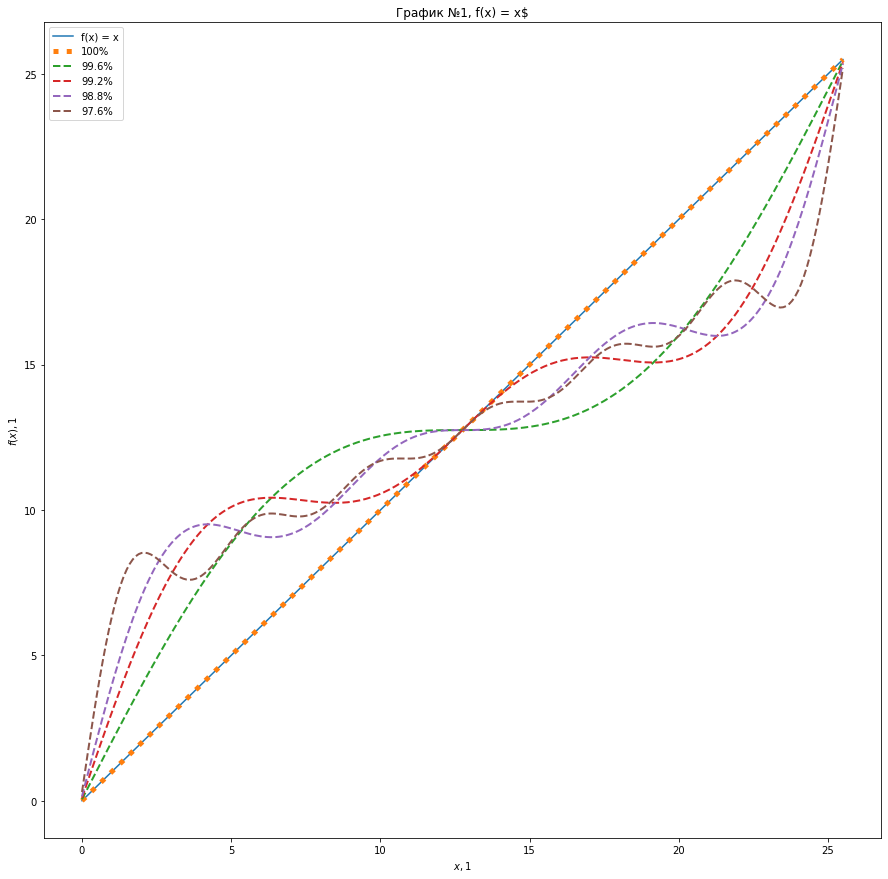

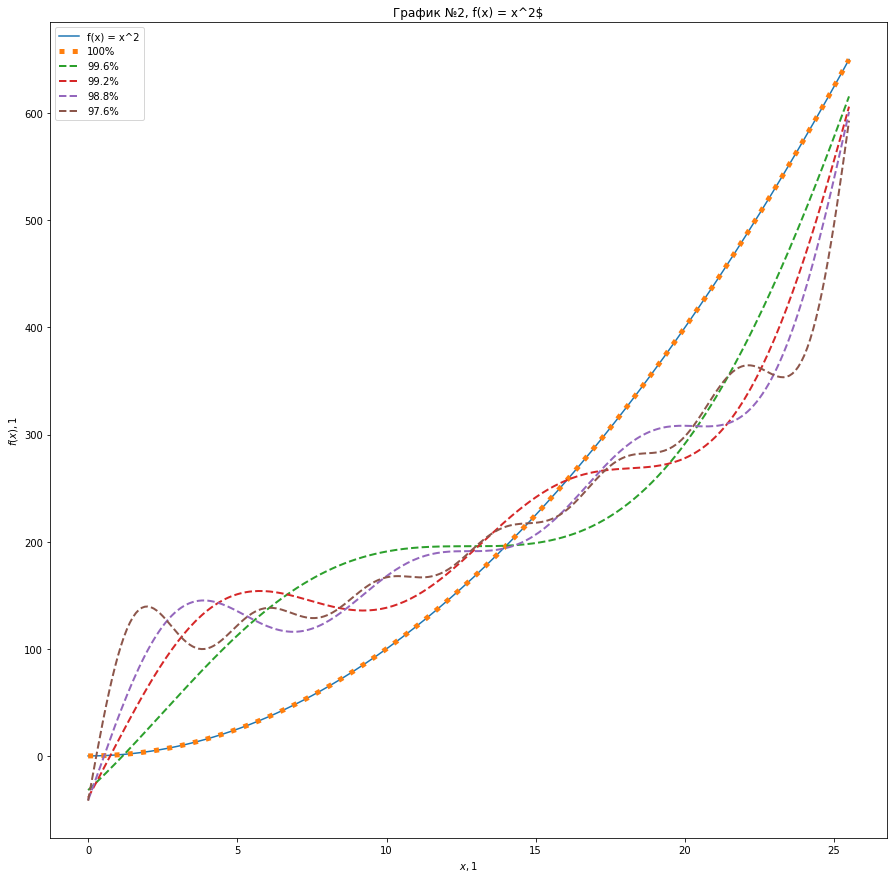

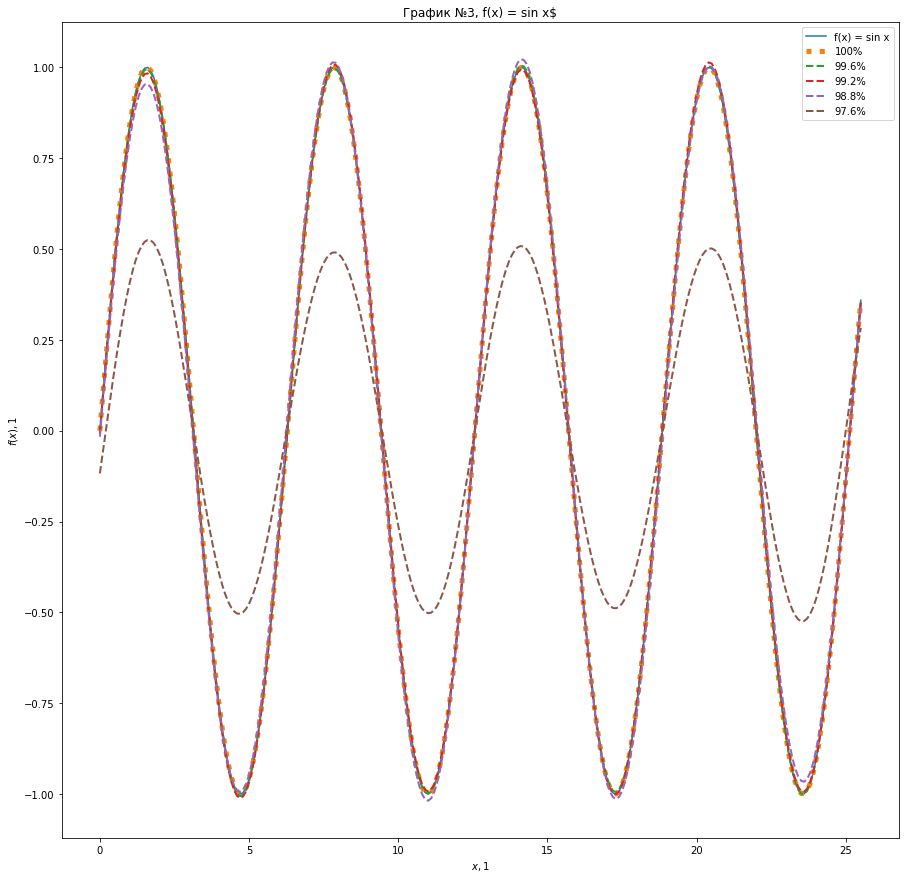

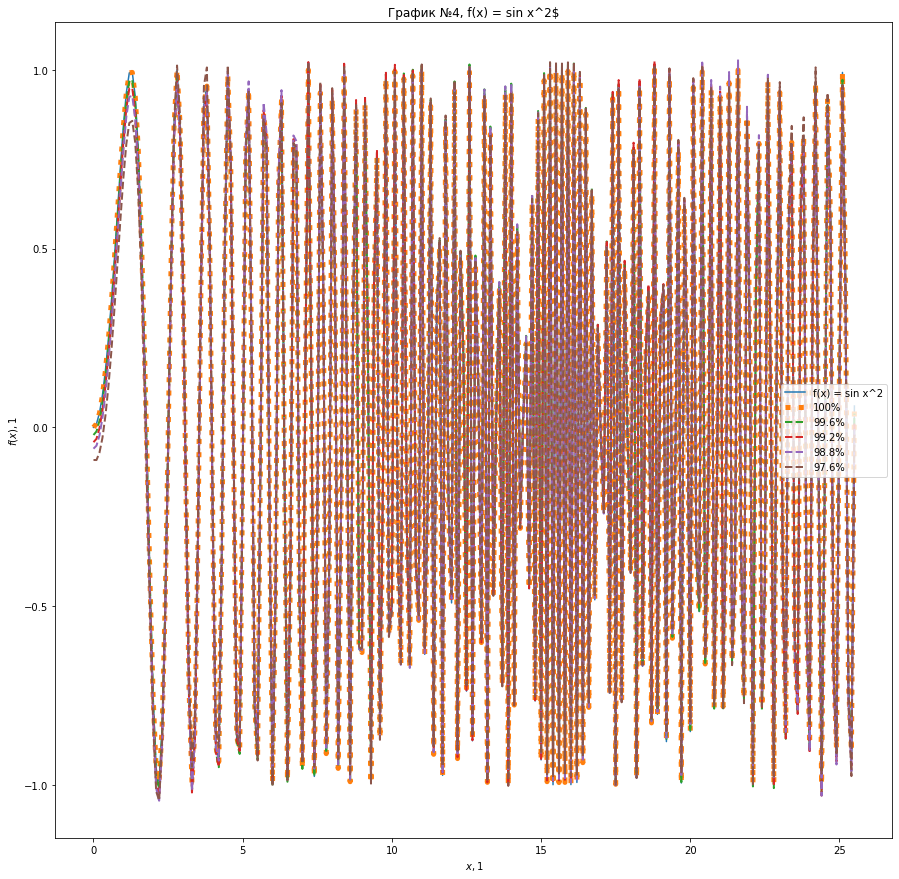

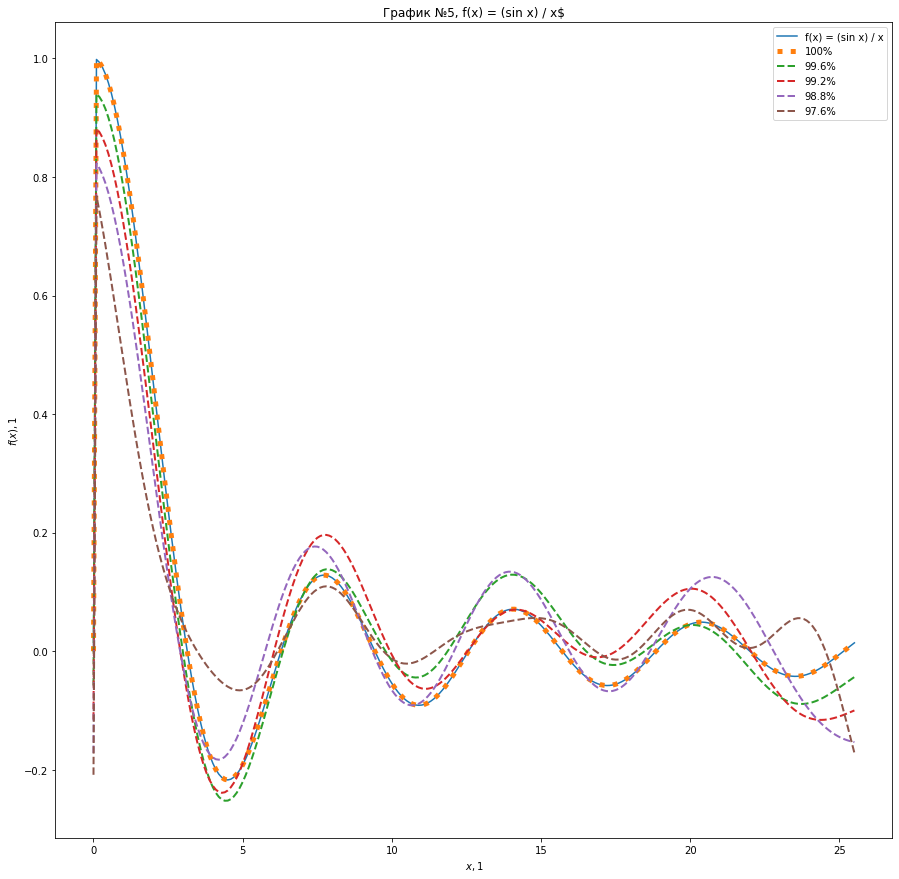

In [81]:
# Analyse some functions.
AnalyseFFT(lambda x: x, 1, "x")
AnalyseFFT(lambda x: x**2, 2, "x^2")
AnalyseFFT(lambda x: sin(x), 3, "sin x")
AnalyseFFT(lambda x: sin(x**2), 4, "sin x^2")
AnalyseFFT(lambda x: sin(x) / (x + 1e-9), 5, "(sin x) / x")